## Hard level array problems

### Pascal triangle
In Pascal's triangle, each number is the sum of the two numbers directly above it as shown  
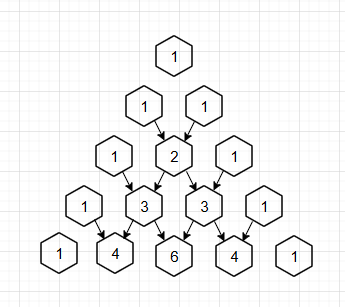   

#### Finding element at given row and column
Like row = 5, col = 3, the element at that place is 6.  

To get the element use combination of row-1 and col-1: <sup>row-1</sup>C<sub>col-1</sub>  
<sup>row-1</sup>C<sub>col-1</sub> = (row-1)! / (col-1)! * ((row-1)-(col-1))!

In [8]:
import math
row = 5
col = 3
a = math.factorial(row-1) // (math.factorial(col-1) * math.factorial((row-1)-(col-1)))
print(a)

6


In [ ]:
# Short cut to find combination
def nCr(n,r):
    res = 1
    for i in range(r):
        res = res * (n-i)
        res = res / (i+1)
    return res
row = 5
col = 3
ans = nCr(row-1,col-1)
print(int(ans))
# Time complexity: O(r)

6


#### Print entire row
Consider the row we have to print is 4th  
row -> 1 3 3 1

- nth row will have n elements  
- print entire, column will go from 1 -> row.no

In [ ]:
r = 4
for i in range(1,r+1):
    print(int(nCr(r-1,i-1)),end=" ")

# Time complexity is O(nxr)

1 3 3 1 

Use 0 based indexing for each column  
Start with ans = 1, then each element of the row can be obtained by  
ele = ans x ((row-col)/col)  
Update ans = ele every time 

In [2]:
r = 4
ans = 1
print(ans,end=" ")
for i in range(1,r):
    ele = int(ans * ((r-i)/i))
    print(ele, end=" ")
    ans = ele

1 3 3 1 

#### Print full pascal triangle
Print all rows from 1 -> n

In [7]:
n = 6
ans = []
for i in range(1,n+1):
    temp = []
    t = 1
    temp.append(t)
    for j in range(1,i):
        ele = int(t * ((i-j)/j))
        temp.append(ele)
        t = ele
    ans.append(temp)
for i in ans:
    print(i)

[1]
[1, 1]
[1, 2, 1]
[1, 3, 3, 1]
[1, 4, 6, 4, 1]
[1, 5, 10, 10, 5, 1]


### Majority element (more than n/3 times)
Consider array [1,1,1,3,3,2,2,2]  
n = 8, math.floor(8/3) ~ 2 times  
elements appearing more than 2 times are [1,2]  

There will always at max 2 elements will be appear n/3 times  
Because,  
n = 8, math.floor(8/3) ~ 2 times (element should appear atleast 3 times)  
If 3 elements appear 3 times, 3+3+3 = 9, but there are only 8 elements,  
so at max only 2 elements will appear n/3 times, and at minimum 0 elements will appear more than n/3 times

In [ ]:
# Brute force: Count each element
import math
arr = [1,1,1,3,3,2,2,2]
n = len(arr)
me = []
for i in range(n):
    c = 0
    for j in range(n):
        if arr[j] == arr[i]:
            c+=1
    if c > math.floor(n/3) and arr[i] not in me:
        me.append(arr[i])
print(me)
# Time complexity: O(n^2)
# Space complexity: O(1)

[1, 2]


In [14]:
import math
arr = [1,1,1,3,3,2,2,2]
ans = []
n = len(arr)
for i in range(n):
    if len(ans)==0 or ans[0]!=arr[i]:
        # If no majority element or existing majority element is already appeared
        c = 0
        for j in range(n):
            if arr[j]==arr[i]:
                c+=1
        if c > math.floor(n/3):
            ans.append(arr[i])
        if len(ans) == 2:
            # At max only 2 majority elements
            break
print(ans)
# Time complexity in worst case scenario is O(n^2)
# Space complexity: O(1)

[1, 2]


In [ ]:
# Using hash map: Remember each element count as key-value pair
d = {}
me = []
for i in range(n):
    if arr[i] in d:
        d[arr[i]] +=1
    else:
        d[arr[i]] = 1
for i in d:
    if d[i] > math.floor(n/3):
        me.append(i)
print(me)
# Time complexity: O(n)
# Space complexity worst case scenario: O(n)

[1, 2]


Maintain the following variables  
c1 = 0, e1 = 0
c2 = 0, e2 = 0

If count of both is 0 we assume that the majority is that element.

Start looping from 0 -> n-1, if same element appears increase the count or else decrease the count by 1.

In [ ]:
# Optiimal solution: Moore voting algorithm
c1,c2,e1,e2 = 0,0,0,0
for i in range(n):
    if c1 == 0 and arr[i]!=e2:
        c1 = 1
        e1 = arr[i]
    elif c2 == 0 and arr[i]!=e1:
        c2 = 1
        e2 = arr[i]
    elif arr[i] == e1:
        c1+=1
    elif arr[i] == e2:
        c2+=1
    else:
        c1-=1
        c2-=1
print(e1,e2)

# Manual check if the suppose to be elements are actual manual elements
mc1, mc2 = 0, 0
for i in range(n):
    if arr[i] == e1:
        mc1 += 1
    elif arr[i] == e2:
        mc2 += 1
if mc1 > math.floor(n/3) and mc2 > math.floor(n/3):
    print(e1,e2)

# Time complexity: O(2n)
# Space complexity: O(1)

1 2
1 2


### 3 Sum
Consider the array = [-1,0,1,2,-1,-4] we have to find all the triplets whose sum is zero. All the 3 elements should be unique

In [ ]:
# Brute force: 3-level nested loop
arr = [-1,0,1,2,-1,4]
triplets = []
for i in range(len(arr)):
    for j in range(i+1,len(arr)):
        for k in range(j+1,len(arr)):
            if arr[i]+arr[j]+arr[k] == 0:
                t = sorted([arr[i],arr[j],arr[k]])
                if t not in triplets:
                    triplets.append(t)
print(triplets)
# Time complexity is O(n^3)
# Space complexity: O(1)

[[-1, 0, 1], [-1, -1, 2]]


We know that arr[i] + arr[j] + arr[k] = 0  
also we can derive arr[k] = -(arr[i] + arr[j])  
We have to arr[k] and add to the triplet  
For lookup we are going to use hashing

In [3]:
# Using hashing map
arr = [-1,0,1,2,-1,4]
triplets = []
for i in range(len(arr)):
    hashmap = set([])
    for j in range(i+1,len(arr)):
        k = -(arr[i]+arr[j])
        if k in hashmap:
            t = sorted([arr[i],arr[j],k])
            if t not in triplets:
                triplets.append(t)
        hashmap.add(arr[j])
print(triplets)
# Time complexity: O(n^2 x log(m)), m is size of hashmap
# Space complexity: O(n)



[[-1, 0, 1], [-1, -1, 2]]


#### Optimal
First sort the given array  
Set pointer i,j, and k  
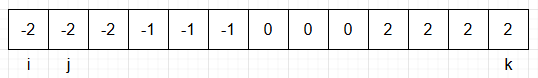  
- add all the 3 (if sum < 0 move j else sum > 0 move k)
- move j or k untill sum reaches 0
- when sum reaches 0, move j and k such that they reach to new element other than the previous one
- k will cross j at some point -> stop
- move i untill it reaches element other than the previous, reset the j(next to i) and k(at the end)

In [ ]:
# optimal: using 2 pointer
nums = [-1,0,1,2,-1,4]
nums.sort()
triplets = []
for i in range(len(nums)):
    if i>0 and nums[i]==nums[i-1]:
        continue # Untill i is not same as previous element
    j = i+1
    k = len(nums) - 1
    while(j<k):
        s = nums[i]+nums[j]+nums[k] 
        if s<0:
            j+=1
        elif s>0:
            k-=1
        else:
            triplets.append([nums[i],nums[j],nums[k]])
            j+=1
            k-=1
            while(nums[j]==nums[j-1]):
                j+=1 # Untill j is not same as previous element
            while(nums[k]==nums[k+1]):
                k-=1 # Untill k is not same as previous element
print(triplets)
# Time complexity: O(n log n) + O(n^2)
# Space complexity: O(1)

[[-1, -1, 2], [-1, 0, 1]]


### 4 Sum
Consider the following array: [1,0,-1,0,-2,2]  
Find the elements such that  
nums[i]+nums[j]+nums[k]+nums[l] = target and i!=j!=k!=l

In [ ]:
# Four level loops
nums = [1,0,-1,0,-2,2]
n = len(nums)
ans = []
for i in range(n):
    for j in range(i+1,n):
        for k in range(j+1,n):
            for l in range(k+1,n):
                s = nums[i]+nums[j]+nums[k]+nums[l]
                t = sorted([nums[i],nums[j],nums[k],nums[l]])
                if s==0 and t not in ans:
                    ans.append(t)
print(ans)

# Time complexity: O(n^4)
# Space complexity: O(1)

[[-1, 0, 0, 1], [-2, -1, 1, 2], [-2, 0, 0, 2]]


Consider nums[i]+nums[j]+nums[k]+nums[l] = target  
then nums[l] = target - (nums[i]+nums[j]+nums[k])  
Use hash map similar to 3 sum

In [ ]:
# Using hashmap
nums = [1,0,-1,0,-2,2]
n = len(nums)
ans = []
for i in range(n):
    for j in range(i+1,n):
        h = set()
        for k in range(j+1,n):
            s = nums[i]+nums[j]+nums[k]
            l = 0 - s
            if l in h:
                t = sorted([nums[i],nums[j],nums[k],l])
                if t not in ans:
                    ans.append(t)
            h.add(nums[k])
print(ans)
# Time complexity: O(n^3)
# Space complexity: O(n)

[[-1, 0, 0, 1], [-2, -1, 1, 2], [-2, 0, 0, 2]]


#### Optimal
1. First sort the array
2. Set the pointers like below  
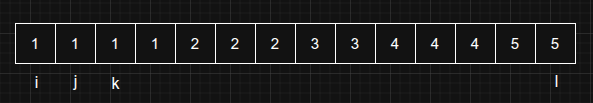  
3. Add all the 4 numbers  
    - if sum is equal to target move l and k till it we get new value
    - some point k will cross l, at that point move j till new value and reset k and l.
    - if sum < target move k else sum > target move l
4. Repeat for j will end, once j reaches end move i till new value and reset j,k and l

In [ ]:
# Optimal: Using 2 pointer
nums = [1,0,-1,0,-2,2]
nums.sort()
n = len(nums)
ans = []
for i in range(n):
    if i>0 and nums[i] == nums[i-1]:
        continue
    for j in range(i+1,n):
        if j>i+1 and nums[j] == nums[j-1]:
            continue
        k = j+1
        l = n-1
        while(k<l):
            s = nums[i]+nums[j]+nums[k]+nums[l]
            if s < 0:
                k+=1
            elif s > 0:
                l-=1
            else:
                t = sorted([nums[i],nums[j],nums[k],nums[l]])
                ans.append(t)
                k+=1
                l-=1
                while(k<=n-1 and nums[k]==nums[k-1]):
                    k+=1
                while(l>0 and nums[l]==nums[l+1]):
                    l-=1
print(ans)
# Time complexity: O(n log n) + O(n^3)
# Space complexity: O(1)
            

[[-2, -1, 1, 2], [-2, 0, 0, 2], [-1, 0, 0, 1]]


### Largest subarray with sum 0
Consider the given array [15,-2,2,-8,1,7,10,23] we have to find out length of the largest subarray whose sum is 0

In [ ]:
# Brute force: Generating all aubarrays
arr = [15,-2,2,-8,1,7,10,23]
maxlen = 0
for i in range(len(arr)):
    for j in range(i,len(arr)):
        s= sum(arr[i:j+1])
        if s == 0:
            maxlen = max(maxlen,len(arr[i:j+1]))
print(maxlen)
# Time complexity: O(n^3) along with sum
# Space complexity: O(1)

5


In [5]:
# Optimal: Using hash map and prefix sum
maxlen = 0
s = 0
hashmap = dict()
for i in range(len(arr)):
    s += arr[i]
    if s == 0:
        maxlen = i+1
    else:
        if s in hashmap:
            maxlen = max(maxlen, i-hashmap[s])
        elif s not in hashmap:
            hashmap[s] = i

print(maxlen)
# Time complexity: O(N log N)
# Space complexity: O(n)

5


### Count subarray with xor K
Consider the array [4,2,2,6,4] and k = 6  
We have to find number of subarray's in which if we XOR all the elements we will get k = 6

In [ ]:
# Brute force: Generating all subarrays
arr = [4,2,2,6,4]
k = 6
c = 0
for i in range(len(arr)):
    x = 0
    for j in range(i,len(arr)):
        x ^= arr[j]
        if x == k:
            c+=1
print(c)
# Time complexity: O(n^2)
# Space complexity: O(1)

4


In [ ]:
# Optimal: Using hashmap and concept similar to presum
hashmap = {0:1}
k = 6
c = 0
y = 0
for i in range(len(arr)):
    y ^= arr[i]
    x = y ^ k
    if x in hashmap:
        c += hashmap[x]
    if y in hashmap:
        hashmap[y] +=1
    else:
        hashmap[y] = 1

print(c)



4


### Merge overlapping subintervals
Consider the array containing subintervals  
[(1,3),(2.6),(8,9),(9,11),(8,10),(2,4),(15,18),(16,17)]  
Consider the intervals  
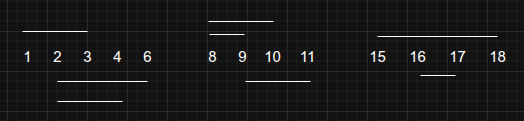  
So we will get after merging intervals  
(1,6) (8,11) (15,18)

- First we will sort the array
- Start the iteration
    - Assume the first element to be the merged interval
    - Next element, if first of the pair exist in between the assume interval and second element is greater than second of assumed interval, replace it.
    - If the next element is not in the interval the stop
- Next element
    - If next element already in the interval obtained early then move to next element or else repeat the previous step

In [ ]:
# Brute force
ans = []
# First sort the array
intervals = [[1,3],[2,6],[8,9],[9,11],[8,10],[2,4],[15,18],[16,17]]
intervals.sort()
# Start iteration
for i in range(len(intervals)):
    start = intervals[i][0] # Set start of the assumed interval
    end = intervals[i][1] # Set end of the assumed interval
    if ans!=[] and end <= ans[-1][1]:
        # Check if the end is less than the end of last interval of ans
        continue
    for j in range(i+1,len(intervals)):
        if intervals[j][0] <= end:
            # Check if already lies in assumed interval
            end = max(end, intervals[j][1])
        else:
            break
    ans.append([start,end])
print(ans)
# Time complexity: O(n log n) + O(n^2)
# Space complexity: O(1)

[[1, 6], [8, 11], [15, 18]]


#### Optimal
- Assume first element to be the interval because ans is empty
- Next the first of next element is less than end then it lies in the interval and if second is greater than end, replace it
    - if first of next element is greater than end then assume this element to be new interval and append previous to ans

In [7]:
# Optimal
ans = []
# First sort the array
intervals = [[1,3],[2,6],[8,9],[9,11],[8,10],[2,4],[15,18],[16,17]]
intervals.sort()
start = intervals[0][0]
end = intervals[0][1]
for i in range(1,len(intervals)):
    if intervals[i][0] <= end:
        end = max(end, intervals[i][1])
    else:
        ans.append([start,end])
        start = intervals[i][0]
        end = intervals[i][1]
# Append the last updated merge interval
ans.append([start,end])
print(ans)
# Time complexiy: O(n log n) + O(n)
# Space complexity: O(1)

[[1, 6], [8, 11], [15, 18]]


### Merging two sorted arrays
Conisder the following 2 sorted arrays  
arr1 = [1,3,5,7] and arr2 = [0,2,6,8,9]  
after we merge them we will get [0,1,2,3,5,6,7,8,9]

In [ ]:
# Brute force: use third array to store merged and using 2 pointers
arr1=[1,3,5,7]
arr2=[0,2,6,8,9]
arr3 = []
m = 4
n = 5
left =0
right = 0
while left<m and right<n:
    if arr1[left] <= arr2[right]:
        arr3.append(arr1[left])
        left+=1
    else:
        arr3.append(arr2[right])
        right+=1
for i in range(left,m):
    arr3.append(arr1[i])
for j in range(right,n):
    arr3.append(arr2[j])
print(arr3)
for i in range(n+m):
    if i<m:
        arr1[i] = arr3[i]
    else:
        arr2[i-m] = arr3[i]
print(arr1, arr2)
# Time complexity: O(2(m+n))
# Space complexity: O(m+n)

[0, 1, 2, 3, 5, 6, 7, 8, 9]
[0, 1, 2, 3] [5, 6, 7, 8, 9]


In [ ]:
# Optimal
arr1=[1,3,5,7]
arr2=[0,2,6,8,9]
m = 4
n = 5
left = m-1 # Start from the last
right = 0
while left>=0 and right<n:
    if arr1[left] >= arr2[right]:
        arr1[left],arr2[right] = arr2[right],arr1[left]
        left-=1
        right+=1
    else:
        break
arr1.sort()
arr2.sort()
print(arr1,arr2)
# Time complexity: O(min(n,m)) + O(m log m) + O(n log n)
# Space complexity: O(1)

[0, 1, 2, 3] [5, 6, 7, 8, 9]


### Finding missing and repeated values
Consider the array [4,3,6,2,1,1] and n=6 which means [1,2,3,4,5,6]  
If we compare both we found that 5 is missing and 1 is appearing 2 times

In [ ]:
# Brute force
arr = [4,3,6,2,1,1]
n = 6
missing = None
repeating = None
for i in range(1,n+1):
    count = 0
    for j in range(n):
        if arr[j] == i:
            count+=1
    if count==2:
        repeating = i
    if count==0:
        missing = i
print(missing, repeating)
# Time complexity: O(n^2)
# Space complexity: O(1)

5 1


In [ ]:
# Better: Using hashmap
arr = [4,3,6,2,1,1]
n = 6
h = [0]*(n+1)
missing = None
repeating = None
for i in range(n):
    h[arr[i]]+=1
for i in range(1,n+1):
    if h[i] == 2:
        repeating = i
    if h[i] == 0:
        missing = i
print(missing, repeating)
# Time complexity: O(2n)
# Space complexity: O(n)

5 1


Let x -> repeating, y -> missing  
- Sum all array value - s1
- Sum from 1 to n - sn
- subtract s1-sn
- We found that x-y = s1-sn
- Square all array and sum -s2
- Square from 1 to n - s2n
- subtract s2-s2n
- We found the x<sup>2</sup>-y<sup>2</sup> = s2-s2n
- (x-y)(x+y) = s2-s2n

We find x and y by solving x+y and x-y


In [ ]:
# Using basic math
arr = [4,3,6,2,1,1]
n=6
x=None
y=None
sn = (n*(n+1))/2
s2n = (n*(n+1)*(2*n+1))/6
s1 = 0
s2 = 0
for i in range(n):
    s1 += arr[i]
    s2 += (arr[i]*arr[i])
val1 = s1-sn # x-y
val2 = (s2-s2n)/val1 # x+y
x = (val1+val2)/2 # (x-y)+(x+y) = 2x
print(x)
y = val2 - x
print(y)

1.0
5.0
